# Assignment Netwerkanalyse

## Notebook made by

**Gebruik graag dit formaat**

* Voor de namen:  voornaam rest van je naam, voornaam rest van je naam,....
* je studentnummers: hetzelfde: scheidt met `,`
* je emails: hetzelfde: scheidt met `,`
* voor je groep: alleen de hoofdletter (dus voor de groep van Marx zou je `A` kiezen)

__Namen__:Anoniem
__Emails__:Anoniem
__Student id__:Anoniem
__Groep__:Anoniem

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Week 5

In [1]:
import random
import pandas as pd
import networkx as nx
import operator
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import defaultdict, Counter
from nose.tools import assert_equal
from numpy.testing import assert_almost_equal
%matplotlib inline

# First course Chap 3, exercises 3.1-3.10

Maak ze allemaal netjes in de cel hieronder.

YOUR ANSWER HERE

# First course Chap 2, exercise 2.41

In [2]:
# load the data; vervang de fname naar jouw pad (jij hebt deze data set zelf de eerste week gedownload, vanuit de github van het boek)
fname='/Users/robinkuipers/uva/jaar2/FirstCourseNetworkScience/datasets/socfb-Northwestern25/socfb-Northwestern25.edges.gz'
fname="/Users/rubenvanheusden/Desktop/NetworkScience2024/Teacher/FirstCourseInNetworkScience/FirstCourseNetworkScience/datasets/socfb-Northwestern25/socfb-Northwestern25.edges.gz"
G = nx.read_edgelist(fname)
print(len(G))  # Do not try to draw this network

10567


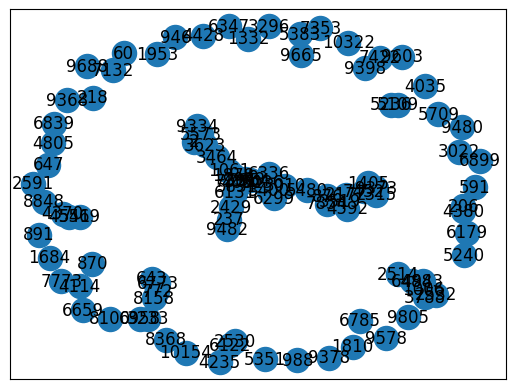

In [3]:
# probeer maar eens met 1000. Dat wil je niet.
sample= np.random.choice(np.array(G), 100, replace=False)
nx.draw_networkx(G.subgraph(sample))

In [4]:
hoeveel_knopen=len(G.nodes)
hoeveel_lijnen=len(G.edges)
dichtheid=nx.density(G)
connected=nx.is_connected(G)
how_many_pairs_of_nodes=hoeveel_knopen * (hoeveel_knopen - 1)/2

#WRITE YOUR CODE HERE
hoeveel_knopen, hoeveel_lijnen, dichtheid, connected, how_many_pairs_of_nodes


(10567, 488337, 0.008747567709293077, False, 55825461.0)

# Vraag 2.41 deelvraag 4 

* Zorg dat je eerst test of `G` verbonden is, en zo niet bereken het dan over de giant component

/var/folders/1l/3m50rd612293xlpk2jrpyqbm0000gn/T/ipykernel_32288/1605043123.py:21: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  u, v = random.sample(G.nodes, 2)


Gemiddelde= 2.7
count    100.000000
mean       2.700000
std        0.522233
min        2.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
dtype: float64


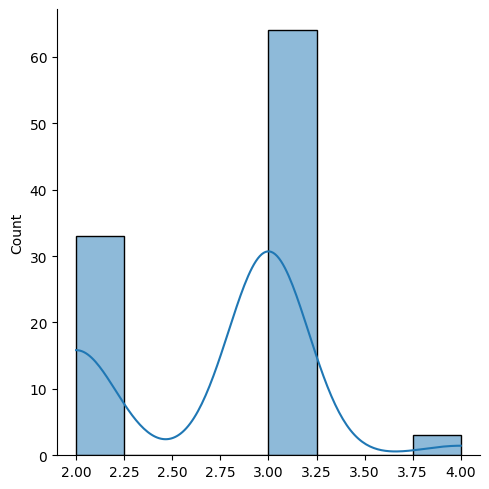

In [5]:
#random.sample(G.nodes,2)

def shortest_path_length_sample(G,samplesize=1000):
    '''Return a list with samplesize shortest path lengths'''
    #WRITE YOUR CODE HERE
    
    path_lengths = []
    nodes =  list(G.nodes)
    sampled_pairs = set()
    
    
    if not nx.is_connected(G):
        comp = max(nx.connected_components(G), key=len)
        G = G.subgraph(comp).copy()
        
    if G.number_of_nodes() < 2:
        return path_lengths
    
    while len(sampled_pairs) < samplesize:
        if len(sampled_pairs) < samplesize:
            u, v = random.sample(G.nodes, 2)
            
            if  (u, v) not in sampled_pairs and (v, u) not in sampled_pairs:
                sampled_pairs.add((u, v))
                try:
                    length = nx.shortest_path_length(G, source=u, target=v)
                    path_lengths.append(length)
                except nx.NetworkXNoPath:
                    continue
    return path_lengths
        
    
        

# run 
sample_lengths= shortest_path_length_sample(G,100)   


# gemiddelde  

print("Gemiddelde=",round(np.mean(sample_lengths),1))
      
S= pd.Series(sample_lengths)
print(S.describe())
sns.displot(S,kde=True);

In [6]:
L= shortest_path_length_sample(G,10)
assert isinstance(L,list)
assert isinstance(np.mean(L), float)


/var/folders/1l/3m50rd612293xlpk2jrpyqbm0000gn/T/ipykernel_32288/1605043123.py:21: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  u, v = random.sample(G.nodes, 2)


# En schat nu de diameter

Diameter 4


/var/folders/1l/3m50rd612293xlpk2jrpyqbm0000gn/T/ipykernel_32288/1605043123.py:21: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  u, v = random.sample(G.nodes, 2)


count    100.000000
mean       2.660000
std        0.684902
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
dtype: float64


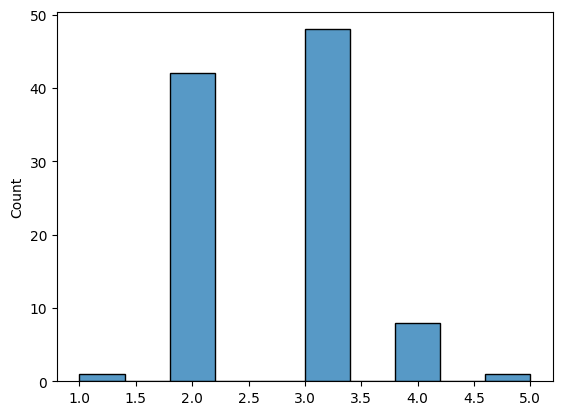

In [7]:
diameter=4



 
#WRITE YOUR CODE HERE
print("Diameter",diameter)
# run 
sample_lengths= shortest_path_length_sample(G,100)   
      
S= pd.Series(sample_lengths)
print(S.describe())
sns.histplot(S);

# En nu de clustering coefficient

* Probeer eerst eens met networkx, maar dan op de karate club graaf.
* Het gemiddelde kan `pandas` of `numpy` mooi voor je uitrekenen.
    * We laten zien hoe dat werkt op een willekeurige dict.
    * Maak het zelf af. Kijk ook eens naar dat histogram. 
* Zijn degrees normaal verdeeld?

count    34.000000
mean      4.588235
std       3.877813
min       1.000000
25%       2.000000
50%       3.000000
75%       5.000000
max      17.000000
dtype: float64
gemiddelde is  4.588235294117647


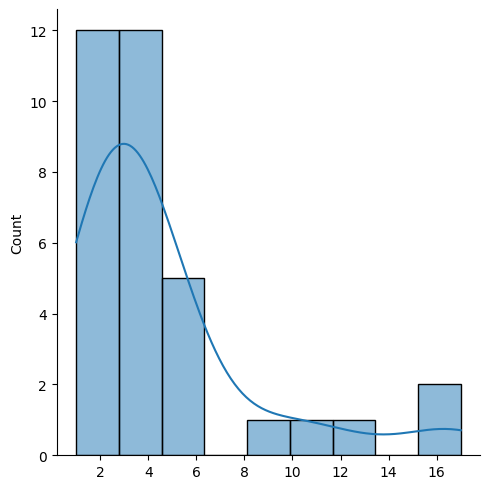

In [8]:
# Voorbeeld: hoe vaak komt elke degree voor in de karateclub

H= nx.karate_club_graph()

alle_degrees=pd.Series(dict(H.degree()))
print(alle_degrees.describe())  # sleutel waardes van de degree verdeling
print("gemiddelde is ",alle_degrees.describe()['mean'])
sns.displot(alle_degrees, kde=True);  # hoe vaak komt elke degree voor

In [9]:
%%time

H= nx.karate_club_graph()
alle_degrees=pd.Series(dict(H.degree()))

gemiddelde=0 # vervang door jouw oplossing
#WRITE YOUR CODE HERE
gemiddelde = alle_degrees.mean()
print(gemiddelde)

4.588235294117647
CPU times: user 1.41 ms, sys: 204 µs, total: 1.61 ms
Wall time: 1.46 ms


# Assortative or not?

 Maak de functie `my_avg_nn_degree(Network,degree)` af, die dus hetzelfde doet als `nx.algorithms.assortativity.average_degree_connectivity(H)[k]`.  Nu snap je vast beter wat ze daarmee bedoelen. In het boek op bladzijde 38-39 staat het ietwat  cryptisch.


In [10]:
 


def my_avg_nn_degree(Network,degree):
    '''Geeft de gemiddelde degree van de buren, gemiddeld over alle knopen van degree degree.
    In het Engels: 
    It gives the average of the average_neighbor_degree of all nodes with the degree degree.
    average_neighbor_degree(k) for k a node is the average of the degrees of the neighbors of k.'''
    #WRITE YOUR CODE HERE
    neighbor_degrees = []
    
    for node in Network.nodes:
        if Network.degree(node) == degree:
            for neighbor in Network.neighbors(node):
                neighbor_degrees.append(Network.degree(node))
    
    if neighbor_degrees:
        return float(sum(neighbor_degrees) / len(neighbor_degrees))
    else:
        return 0
            
    
    
    
#test, ER ZIJN IN NETWORKX DUS HEEL VEEL MANIEREN OM DIT UIT TE REKENEN, 
# hier kijken we of die allemaal gelijk zijn, voor elke voorkomende degree in de karateclub graaf
# Automatiseer deze test, zodat jij niet zelf alles moet checken. Je maakt zo een foutje! 

H= nx.karate_club_graph()
for k in {k[1] for k in H.degree()}:
    print(k, 
          
          #nx.k_nearest_neighbors(H)[k] , 
          my_avg_nn_degree(H,k),
          nx.algorithms.assortativity.average_degree_connectivity(H)[k]
         )

    
# mooiere test; kijk eens goed, wat gaat er nu mis? Hoe lossen we dat op?

print([(  nx.algorithms.assortativity.average_degree_connectivity(H)[k[1]] , my_avg_nn_degree(H,k[1]) ) for k in H.degree()])
all( nx.algorithms.assortativity.average_degree_connectivity(H)[k[1]]== my_avg_nn_degree(H,k[1]) for k in H.degree())

1 1.0 16.0
2 2.0 12.409090909090908
3 3.0 8.222222222222221
4 4.0 8.541666666666666
5 5.0 10.466666666666667
6 6.0 8.333333333333334
9 9.0 5.777777777777778
10 10.0 6.6
12 12.0 5.083333333333333
16 16.0 4.3125
17 17.0 3.823529411764706
[(4.3125, 16.0), (5.777777777777778, 9.0), (6.6, 10.0), (8.333333333333334, 6.0), (8.222222222222221, 3.0), (8.541666666666666, 4.0), (8.541666666666666, 4.0), (8.541666666666666, 4.0), (10.466666666666667, 5.0), (12.409090909090908, 2.0), (8.222222222222221, 3.0), (16.0, 1.0), (12.409090909090908, 2.0), (10.466666666666667, 5.0), (12.409090909090908, 2.0), (12.409090909090908, 2.0), (12.409090909090908, 2.0), (12.409090909090908, 2.0), (12.409090909090908, 2.0), (8.222222222222221, 3.0), (12.409090909090908, 2.0), (12.409090909090908, 2.0), (12.409090909090908, 2.0), (10.466666666666667, 5.0), (8.222222222222221, 3.0), (8.222222222222221, 3.0), (12.409090909090908, 2.0), (8.541666666666666, 4.0), (8.222222222222221, 3.0), (8.541666666666666, 4.0), (8.54

False

De functie die geschreven moest worden berekent het gemiddelde over alle buren van alle nodes met een specifieke degree elke keer dat de functie wordt aangeroepen. In de tests wordt deze met een generator expression aangeroepen, waardoor de uitkomsten kunnen verschillen. Volgens StackOverflow wordt dit opgelost met het cachen van de returns die de functie geeft. Hieronder is de verbeterde variant waarbij de tests True geven.

In [11]:
def my_avg_nn_degree(Network, degree, cache={}):
    if (Network, degree) in cache:
        return cache[(Network, degree)]
    
    neighbor_degrees = []
    for node in Network.nodes():
        if Network.degree(node) == degree:
            for neighbor in Network.neighbors(node):
                neighbor_degrees.append(Network.degree(neighbor))
    
    if neighbor_degrees:
        average = sum(neighbor_degrees) / len(neighbor_degrees)
    else:
        average = 0
    
    cache[(Network, degree)] = average
    return average

In [12]:
assert isinstance(my_avg_nn_degree(nx.karate_club_graph(),1), float)


# Deel 1: Easley & Kleinberg Chapter 5

## Vraag 1
Maak opdracht [5.6.1 van Easley and Kleinberg](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch05.pdf). Geef je antwoord in de cell hieronder


- 90 nodes
- 3 gc's each consisting of 30 nodes
- connected network
- each node in each gc has a link with every other node of weight 1 and a link to every other node in the two other gc's with weight 0

The network of 90 people seems balanced since each node is friends with the nodes within the group and enemies with the nodes of the other groups. It is not balanced because there are three groups, which creates a scenario in which a node from group A forms a triangle with a friendly node from A, and two enemy nodes from group B and C. Following the Structural Balance Property theorem, this network is not balanced.

## Vraag 2
Maak opdracht [5.6.2 van Easley and Kleinberg](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch05.pdf)

Geef als tuple voor `pos_edge` en `neg_edge`

Dus `pos_edge = (balanced, unbalanced)`, waar balanced en unbalanced het aantal triangles zijn

In [13]:
pos_edge = (2, 1)
neg_edge = (1, 2)

#WRITE YOUR CODE HERE

In [14]:
assert_equal(type(pos_edge), tuple)
assert_equal(type(neg_edge), tuple)
assert_equal(type(pos_edge[0]), int)
assert_equal(sum(pos_edge), 3, "Lees de vraag goed!")

## Vraag 3

Maak opdracht [5.6.3 van Easley and Kleinberg](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch05.pdf). Geef je antwoord in de cell hieronder

a) If node D joins the network, it's not possible to not be part of any unbalanced triangle. If node D forms positive edges with each other node, all triangles will be unbalanced (two -'s and one +'s). Likewise, if node D forms negative edges with each other node, all triangls will be unbalanced (three -'s).

b) If node D forms positive edges with all nodes in the social network of Fig 5.22, all triangles will remain balanced (three +'s or one - and two +'s) whilst if D forms negative edges with each node, one triangle will become unbalanced (two -'s and one +).

c) It is generally not possible for a new node X to join a network containing an unbalanced triangle without becoming involved in any unbalanced triangles itself. The conditions required to balance new triangles formed with X contradict each other due to the existing unbalanced triangle's influence on edge polarity requirements.

## Vraag 4

Maak opdracht [5.6.4 van Easley and Kleinberg](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch05.pdf). Geef je antwoord in de cell hieronder

YOUR ANSWER HERE

# Deel 2: Moties in de Tweede Kamer

In [15]:
def open_file():
    """Loads the graphml"""
    if 'motieslist.csv' in os.listdir():
        return pd.read_csv(
            'motieslist.csv', encoding='utf-8', compression='gzip')
    elif os.path.exists('../../data/Week5'):
        return pd.read_csv(
            '../../data/Week5/motieslist.csv', encoding='utf-8', compression='gzip')
    elif os.path.exists('../../../data/Week5'):
        return pd.read_csv(
            '../../../data/Week5/motieslist.csv',
            encoding='utf-8',
            compression='gzip')


MOTnetwerk = open_file()
MOTnetwerk.datum=MOTnetwerk.datum.astype(int)
MOTnetwerk.head()

,indiener,Partij Indiener,Medeindiener,Partij Medeindiener,datum,URL naar motie
0,S. van Veldhoven,D66,Agnes Mulder,CDA,20161027,https://www.tweedekamer.nl/kamerstukken/moties...
1,S. van Veldhoven,D66,Remco Dijkstra,VVD,20161027,https://www.tweedekamer.nl/kamerstukken/moties...
2,S. van Veldhoven,D66,J. Houwers,VVD,20161027,https://www.tweedekamer.nl/kamerstukken/moties...
3,S. van Veldhoven,D66,Y. Cegerek,PvdA,20161027,https://www.tweedekamer.nl/kamerstukken/moties...
4,S. van Veldhoven,D66,E.M.A. Smaling,SP,20161027,https://www.tweedekamer.nl/kamerstukken/moties...


In [16]:
motie_dict= MOTnetwerk.T.to_dict()
print("We hebben %i moties! " %len(set(motie_dict[key]['URL naar motie'] for key in motie_dict)))

# vergelijk 3 keer hetzelfde
print(MOTnetwerk.loc[0])
print(motie_dict[1])
for attribuut in motie_dict[1].keys():
    print(attribuut,motie_dict[1][attribuut])

We hebben 5686 moties! 
indiener                                                S. van Veldhoven
Partij Indiener                                                      D66
Medeindiener                                                Agnes Mulder
Partij Medeindiener                                                  CDA
datum                                                           20161027
URL naar motie         https://www.tweedekamer.nl/kamerstukken/moties...
Name: 0, dtype: object
{'indiener': 'S. van Veldhoven', 'Partij Indiener': 'D66', 'Medeindiener': 'Remco Dijkstra', 'Partij Medeindiener': 'VVD', 'datum': 20161027, 'URL naar motie': 'https://www.tweedekamer.nl/kamerstukken/moties/detail?id=2016Z19643&did=2016D40515'}
indiener S. van Veldhoven
Partij Indiener D66
Medeindiener Remco Dijkstra
Partij Medeindiener VVD
datum 20161027
URL naar motie https://www.tweedekamer.nl/kamerstukken/moties/detail?id=2016Z19643&did=2016D40515


## Vraag 2

We hebben nu alle moties uit het csv bestand gehaald, en er een dict van dicts van gemaakt.
Voor deze opdracht zijn we benieuwd naar de Tweede Kamer tijdens het missionaire [kabinet Rutte III](https://nl.wikipedia.org/wiki/Kabinet-Rutte_III).   Beperk dus het bestand tot alle moties vanaf (en inclusief) de dag dat dat kabinet beëdigd is.

Noem dit `MotiesRutteIII`, met dezelfde structuur als `motie_dict` hierboven. Eigenlijk is `MotiesRutteIII` een *deelverzameling* van `motie_dict`.

**Check** er zitten 4498 moties in RutteIII. Zoek de juiste datum dus op.

In [17]:
import datetime
start_datum = datetime.date(2017, 10, 26)

MotiesRutteIII = {
    id: motie for id, motie in motie_dict.items()
    if datetime.datetime.strptime(str(motie['datum']), '%Y%m%d').date() >= start_datum
}


#WRITE YOUR CODE HERE
print("We hebben %s moties tijdens Rutte III!" % 
      len(set(motie_dict[key]['URL naar motie'] for key in MotiesRutteIII)))
print("een voorbeeld:")
MotiesRutteIII[2269]

We hebben 4498 moties tijdens Rutte III!
een voorbeeld:


{'indiener': 'M.L. Thieme',
 'Partij Indiener': 'PvdD',
 'Medeindiener': 'Jesse Klaver',
 'Partij Medeindiener': 'GL',
 'datum': 20171102,
 'URL naar motie': 'https://www.tweedekamer.nl/kamerstukken/moties/detail?id=2017Z14642&did=2017D30898'}

In [18]:
assert_equal(type(MotiesRutteIII), dict)
 

## Vraag 3

Maak de verzameling van alle indieners (dus niet medeindieners!) waarin elke indiener maar 1 keer voorkomt gebaseerd op `MotiesRutteIII`. Noem deze `indieners`

In [19]:
indieners = set()
#WRITE YOUR CODE HERE

for motie in MotiesRutteIII.values():
    indieners.add(motie['indiener'])
    
len(indieners), list(indieners)[:5]

(167,
 ['Dennis Wiersma',
  'E. Dijkgraaf',
  'Laura Bromet',
  'S. Geleijnse',
  'Salima Belhaj'])

In [20]:
assert_equal(type(indieners), set)
for indiener in indieners:
    assert_equal(type(indiener), str)

## Vraag 4
Maak een dict `IndienersDict` waarbij de key indiener X is van moties, en de value
de partij is van X. Doe hetzelfde voor medeindieners in de dict `MedeindienersDict` en een dict `CombinedDienersDict` met zowel indieners als medeindieners. Dit is weer gebaseerd op de moties gedurende Rutte III.

Bekijk hoeveel je er van elk hebt en hoeveel in totaal. Gebruik een dict-comprehension!

Deel van het antwoord van CombinedDienersDict:

`{'A. Pechtold': 'D66',
 'A.C.L. (Arno) Rutte': 'VVD',
 'Achraf Bouali': 'D66',
 'Agnes Mulder': 'CDA',
 'Albert van den Bosch': 'VVD',
 'Alexander Kops': 'PVV',
 'André Bosman': 'VVD',
 'Anne Kuik': 'CDA',
 'Anne Mulder': 'VVD',...}`
 
 **Let op** Dicts zijn ongeordend. Jouw antwoord hoeft er dus niet zo uit te zien als hierboven als je het print.

In [21]:
IndienersDict = {motie['indiener']: motie['Partij Indiener'] for motie in MotiesRutteIII.values()}

MedeindienersDict = {motie['Medeindiener']: motie['Partij Indiener'] for motie in MotiesRutteIII.values()}

CombinedDienersDict = {k: IndienersDict.get(k, IndienersDict.get(k)) for k in IndienersDict.keys() | MedeindienersDict.keys()}
#WRITE YOUR CODE HERE
len(IndienersDict), len(MedeindienersDict), len(CombinedDienersDict)

(167, 172, 172)

In [22]:
assert_equal(type(IndienersDict), dict)
assert_equal(type(MedeindienersDict), dict)
assert_equal(type(CombinedDienersDict), dict)

## Vraag 5
Maak een networkx netwerk `G`, waarin zowel alle indieners als medeindieners een knoop zijn, en waarbij je aan elke  knoop toevoegt  van welke partij diegene is. Je voegt dus een node -attribuut toe. Noem dit attribuut `partij`.

We willen een <em>gericht</em> netwerk maken, dus gebruik `G = nx.DiGraph()`. 

In [23]:
G = nx.DiGraph()
#WRITE YOUR CODE HERE

for motie in motie_dict.values():
    G.add_node(motie['indiener'], partij=motie['Partij Indiener'])

    if 'medeindieners' in motie:
        for medeindiener in motie['medeindieners']:
            G.add_node(medeindiener['naam'], partij=medeindiener['partij'])
            G.add_edge(motie['indiener'], medeindiener['naam'])

# Controleer de partij van een specifieke indiener, bijvoorbeeld Suzanne Kröger
if 'Suzanne Kröger' in G:
    print('De partij van Suzanne Kröger is', G.nodes['Suzanne Kröger']['partij'])
else:
    print('Suzanne Kröger is niet gevonden in het netwerk.')

De partij van Suzanne Kröger is GL


In [24]:
assert_equal(nx.is_directed(G), True)
assert_equal(type(nx.get_node_attributes(G, 'partij')), dict)

## Vraag 6
Maak een lijst `InEnMedeIndiener` met paren bestaande uit indieners en medeindieners van dezelfde motie.
Het eerste element van elk paartje is dus de indiener. WE gebruiken een lijst (en geen verzameling) want we zijn ook geinterreseerd in hoe vaak mensen samen indienen.

Je lijst heeft dus de vorm:

`[('M.L. Thieme', 'Jesse Klaver'),
 ('Lodewijk Asscher', 'E.G.M. Roemer'),
 ('Lodewijk Asscher', 'Jesse Klaver'),
 ('Lodewijk Asscher', 'Henk Krol'),
 ('Lodewijk Asscher', 'M.L. Thieme')....]`

In [25]:
InEnMedeIndiener = []
#WRITE YOUR CODE HERE

for motie in motie_dict.values():
    indiener = motie['indiener']
    medeindiener = motie['Medeindiener']
    
    InEnMedeIndiener.append((indiener, medeindiener))
        
# voor indiener in motie
# voor mede indiener in motie

InEnMedeIndiener[:5]

[('S. van Veldhoven', 'Agnes Mulder'),
 ('S. van Veldhoven', 'Remco Dijkstra'),
 ('S. van Veldhoven', 'J. Houwers'),
 ('S. van Veldhoven', 'Y. Cegerek'),
 ('S. van Veldhoven', 'E.M.A. Smaling')]

In [26]:
assert_equal(type(InEnMedeIndiener), list)

## Vraag 7
Maak een lijst `InEnMedeIndienerCounts` met tuples van de vorm:

`[('M.L. Thieme', 'Jesse Klaver', 9),
 ('Lodewijk Asscher', 'E.G.M. Roemer', 3),
 ('Lodewijk Asscher', 'Jesse Klaver', 20),
 ('Lodewijk Asscher', 'Henk Krol', 6),
 ('Lodewijk Asscher', 'M.L. Thieme', 6)...]`

waarin elk tuple het volgende betekent:
    (indiener, medeindiener, "hoe vaak indiener een motie heeft ingediend met medeindiener")

In [27]:
from collections import Counter  # Handig!

#WRITE YOUR CODE HERE

indieners_counter = Counter(InEnMedeIndiener)

InEnMedeIndienerCounts = [(indiener, medeindiener, count) for (indiener, medeindiener), count in indieners_counter.items()]
    



InEnMedeIndienerCounts[:5]

#for x in indieners_counter.keys():
 #   print(x, indieners_counter[x])

[('S. van Veldhoven', 'Agnes Mulder', 13),
 ('S. van Veldhoven', 'Remco Dijkstra', 3),
 ('S. van Veldhoven', 'J. Houwers', 1),
 ('S. van Veldhoven', 'Y. Cegerek', 3),
 ('S. van Veldhoven', 'E.M.A. Smaling', 5)]

In [28]:
assert_equal(type(InEnMedeIndienerCounts), list)

## Vraag 8
Voeg aan je netwerk   alle  weighted edges (A,B) toe waarbij A een indiener is en
    B een medeindiener en  waarin
    het gewicht aangeeft hoe vaak indiener A een motie heeft ingediend met medeindiener B.
    Gebruik edge attributes hiervoor en het speciale attribute `weight`.
       **Je gebruikt natuurlijk je mooie lijst uit de vorige vraag.**

In [29]:
#WRITE YOUR CODE HERE

# 3 testjes achter elkaar
G = nx.DiGraph()

for indiener, medeindiener, count in InEnMedeIndienerCounts:
    G.add_node(indiener)
    G.add_node(medeindiener)
    G.add_edge(indiener, medeindiener, weight=count)

list(G.edges(data=True))[:5], G['Suzanne Kröger']['Cem Laçin'], G['Cem Laçin']['Suzanne Kröger']

([('S. van Veldhoven', 'Agnes Mulder', {'weight': 13}),
  ('S. van Veldhoven', 'Remco Dijkstra', {'weight': 3}),
  ('S. van Veldhoven', 'J. Houwers', {'weight': 1}),
  ('S. van Veldhoven', 'Y. Cegerek', {'weight': 3}),
  ('S. van Veldhoven', 'E.M.A. Smaling', {'weight': 5})],
 {'weight': 83},
 {'weight': 60})

In [30]:
assert_equal(nx.is_directed(G), True)
assert_equal(type(nx.get_edge_attributes(G, 'weight')), dict)

KeyError: 'S. van Veldhoven'

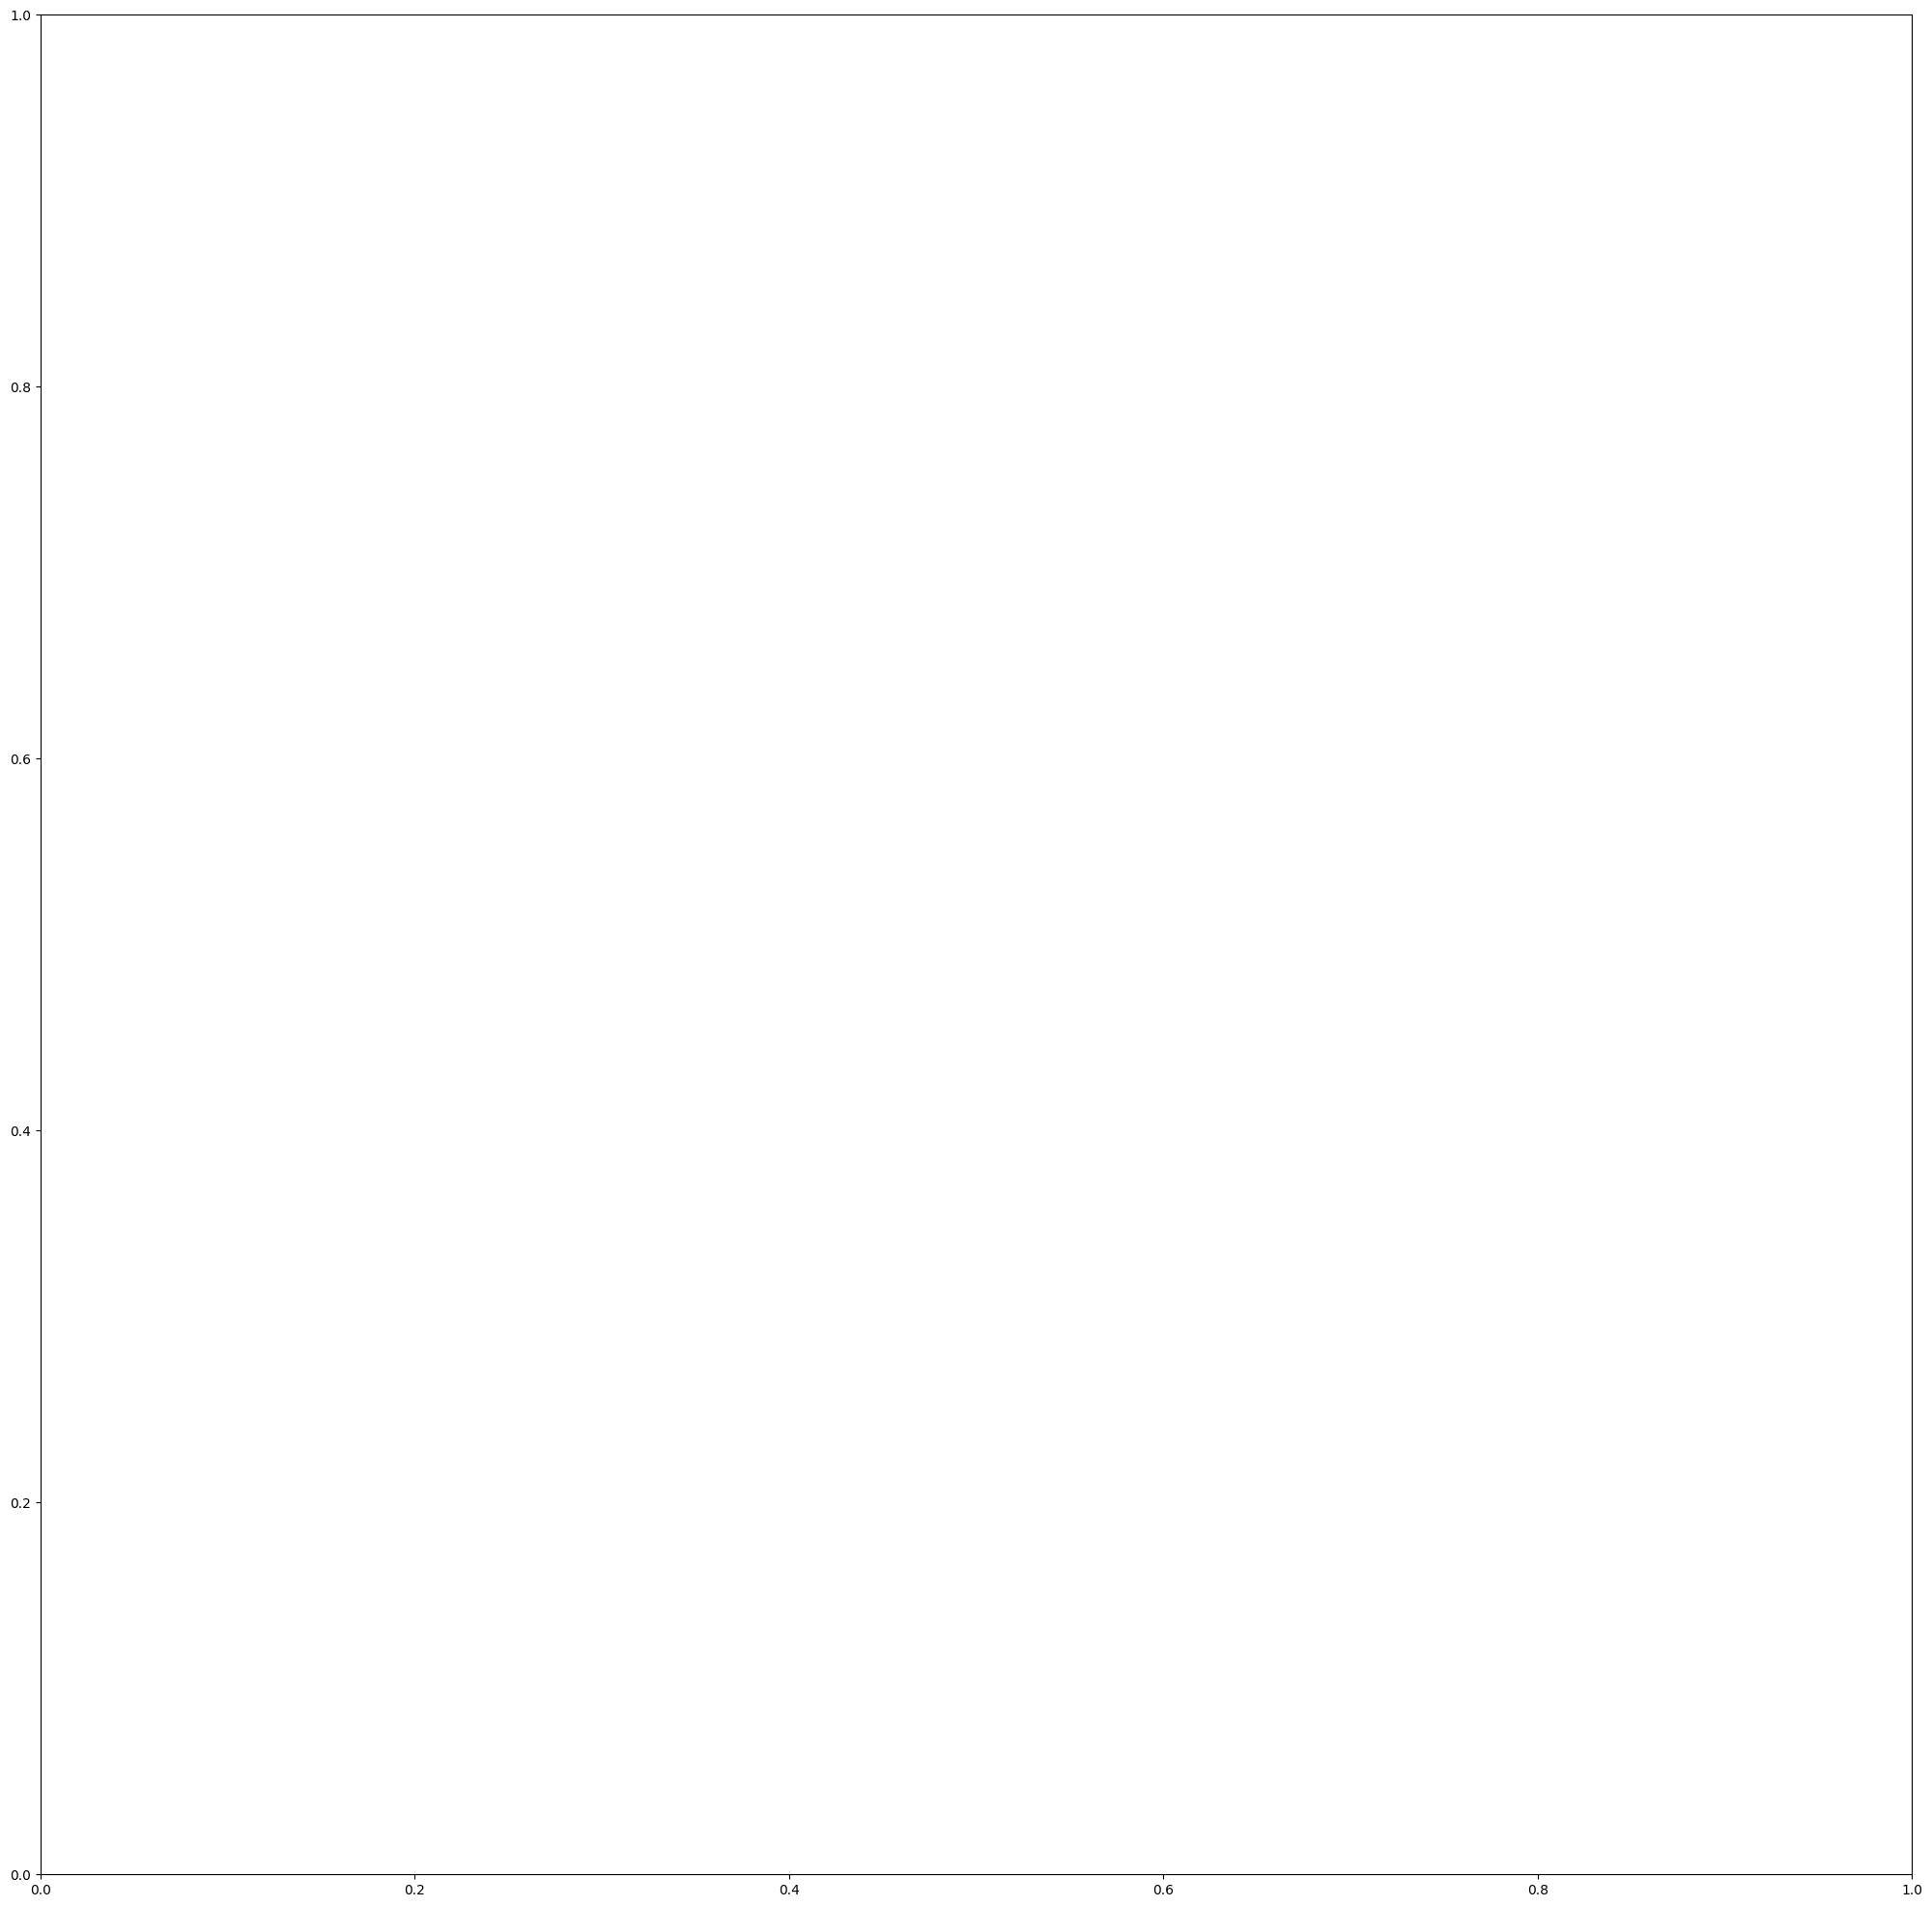

In [31]:
# als dit niet werkt, gaat er waarschijnlijk wat fout

def draw_Rutte(G):
    partijdict = defaultdict(list)
    for key, values in nx.get_node_attributes(G, 'partij').items():
        partijdict[values].append(key)

    plt.figure(figsize=(25, 25))

    node_list = []
    for partij in partijdict.keys():
        node_list += list(partijdict[partij])

    pos = {}
    for i, node in enumerate(node_list):
        theta = 2.0 * np.pi * i / len(node_list)
        pos[node] = (np.cos(theta), np.sin(theta))

    color = sns.color_palette("hls", len(partijdict.keys()))
    for i, j in enumerate(partijdict.keys()):
        c = np.array(len(partijdict[j]) * color[i]).reshape((len(partijdict[j]),3))
        nx.draw_networkx_nodes(
            G, pos, nodelist=partijdict[j], node_color=c, label=j)

    max_weight = max(nx.get_edge_attributes(G, 'weight').values())
    weights = [G[u][v]['weight'] / max_weight for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, width=weights)

    plt.legend()
    plt.axis('off')
    plt.show()


draw_Rutte(G)

## Vraag 9 

* Maak een verzameling `PVV` met alle knopen uit `G` die lid zijn van de PVV.
* Gebruik nu `draw_Rutte` om het samenwerk verband tussen PVVers te tekenen.
* Kijk ook eens naar andere partijen. Valt je iets op?

**HINT** Maak eens de verzameling van alle partijen die voorkomen in netwerk `G`. Dat is 1 set comprehensie (waarbij je niet meer naar `motie_dict` gaat).

We willen nu voor elke partij weten wat de _dichtheid_ (in het Engels _density_) is van de deelgraaf van `G` geinduceerd door de leden van die partij, deze dictionary noemen we `dichtheid_per_partij`.
* Dat maak je gewoon heel makkelijk met 1 dict comprehensie in 1 regel, met daarin nog een geneste set comprehensie.
* Maar goed het mag ook anders hoor.
* Je antwoord ziet er zo uit (of in een andere volgorde natuurlijk):

```
dichtheid_per_partij = {'SGP': 0.16666666666666666, 'DENK': 0.8333333333333334, 'PvdA': 0.13333333333333333,
 ```

In [32]:
PVV = {}
dichtheid_per_partij = dict()

#WRITE YOUR CODE HERE
draw_Rutte(G.subgraph(PVV))
# het antwoord even mooi printen
sorted(dichtheid_per_partij.items(), key=lambda kv: kv[1])

ValueError: max() arg is an empty sequence

<Figure size 2500x2500 with 0 Axes>

In [33]:
assert_equal(type(PVV), set)
assert_equal(type(dichtheid_per_partij), dict)


AssertionError: <class 'dict'> != <class 'set'>

## Vraag 10
Bereken in- en outdegree voor elk knoop in het Rutte netwerk `G`.
Maak hiervoor de twee lijsten `indegree` en `outdegree`, met daarin de tuples met als eerste waarde de degree en als tweede waarde de naam. Sorteer aflopend op de degrees, en bij gelijke degree omgekeerd alfabetisch op naam.

Voorbeeld voor indegree:

`[(52, 'Chris Stoffer'),
  (46, 'Roelof Bisschop'),
  (45, 'Eppo Bruins'),
  (45, 'Carla Dik-Faber'),
  (44, 'Kees van der Staaij')...]`

Op https://data.kro-ncrv.nl/kamerleden-2018/ kun je zien dat een aantal van hen ook bij de meest succesvolle kamerleden (hoogste percentage aangenomen moties en amendementen) van deze kabinetsperiode horen.

**Hint:** Kijk eens naar de code in de volgende vraag..... Dat helpt he?

In [34]:
indegree = []
outdegree = []
#WRITE YOUR CODE HERE
indegree[:5], outdegree[:5]

([], [])

In [35]:
assert_equal(type(indegree), list)
assert_equal(type(indegree[0]), tuple)
assert_equal(type(outdegree), list)
assert_equal(type(indegree[0]), tuple)


IndexError: list index out of range

## Vraag 11

Beschouw het Rutte netwerk `G` nu als <strong>een ongerichte graaf</strong> en bepaal de betweenness centrality van elke knoop.

Maak een dictionary `bcDict` met als key de knoop en als value de betweenness centrality.

Voorbeeld: `{'A. Pechtold': 0.0,
 'A.C.L. (Arno) Rutte': 0.0008961172303149877,
 'Achraf Bouali': 0.0009292316373274312,
 'Agnes Mulder': 0.005956492682257983,
 'Albert van den Bosch': 0.0005094599555776784,
 'Alexander Kops': 0.006054635024810758,
 'André Bosman': 0.003933997703294198,
 'Anne Kuik': 0.007195012823896772,
 'Anne Mulder': 6.656473869236166e-05,..}`

In [36]:
bcDict = dict()

#WRITE YOUR CODE HERE

#even kijken naar wie de hoogste scores hebben
sorted(bcDict.items(), key=operator.itemgetter(1), reverse=True)[:5]


[]

In [37]:
assert_equal(type(bcDict), dict)
assert_equal(type(list(bcDict.keys())[0]), str)
assert_equal(type(list(bcDict.values())[0]), float)


IndexError: list index out of range

# Theorie vragen

## Vraag 17

Given a complete   undirected graph G with n vertices. 

1. Argue
that a given vertex u can lie on XX  shortest paths connecting
                two other (distinct) vertices.  Find XX yourself.  

2. On how many paths without duplicates does u lie? Give your argument. Hint: this is not easy! You must count very precisely.
    * Give the argument, and then program it as well. (You get half a point for both)
            

YOUR ANSWER HERE

In [38]:
#WRITE YOUR CODE HERE

def vraag17(n):
    #WRITE YOUR CODE HERE
vraag17(20), vraag17(3), vraag17(4), vraag17(30), type(vraag17(3))

IndentationError: expected an indented block after function definition on line 3 (3935883357.py, line 5)

In [39]:
assert isinstance(vraag17(3), int)



NameError: name 'vraag17' is not defined

## Vraag 18 (2pt)

1. Geef in het Nederlands de definitie van een  [ongericht bipartiet netwerk](https://en.wikipedia.org/wiki/Bipartite_graph).
    * Je definitie moet zo precies zijn dat als je er een netwerk G "aan geeft" dat de defnitie dan kan bepalen of het bipartiet is of niet. 
    * Je definitie is dus al bijna een _algorithme_ of een _programma_.

2. Gebruik je definitie   om een echt programma te maken. Het probeert gewoon elke verdeling.
    * Van networkx mag je alleen `G.nodes, G.edges, G.subgraph` gebruiken.
    * Hint: <https://www.geeksforgeeks.org/python-program-to-get-all-subsets-of-given-size-of-a-set/>
    * Hoeveel checks moet je uitvoeren bij een netwerk van $n$ knopen?
    * Hoeveel bij  netwerken van 3,5,10,20,30 knopen? (je kan dit zonder rekenmachine).

YOUR ANSWER HERE

None
None
CPU times: user 23.7 ms, sys: 2.35 ms, total: 26.1 ms
Wall time: 24 ms


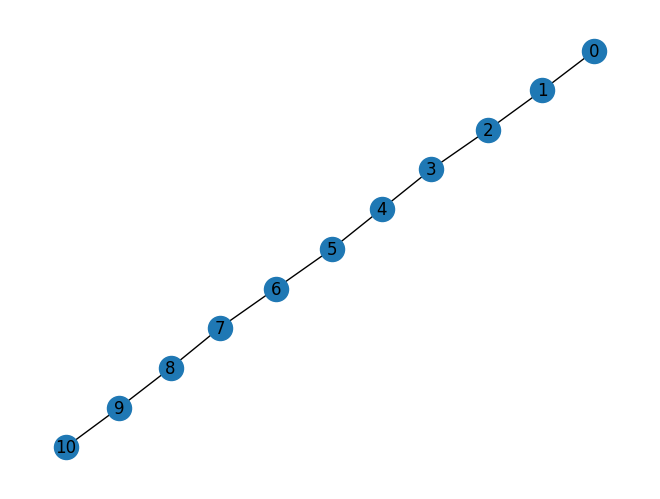

In [40]:
%%time
#WRITE YOUR CODE HERE
def bipartiet(G):
    '''Returns True iff G is bipartite'''
    #WRITE YOUR CODE HERE

G = nx.house_graph()
print(bipartiet(G))
#nx.draw_kamada_kawai(G, with_labels=True)
H= nx.Graph()
H.add_edges_from([(i,i+1) for i in range(10)])
nx.draw_kamada_kawai(H, with_labels=True)

print(bipartiet(H))